[ 16.  83.  34.   2.   1.   4.  12.  23.  19. 143.  83.   1.   0.   2.
   2.   2.   1. 143. 143.   0.   1.   2.   2.   1.  11. 143.  94.   0.
   0.   0.   1.   3.  17.  94.  70.   2.   1.   1.   1.   1. 143.  85.
  24.   1.   0.   5.  21.  27.  27.  70.  54.   1.   2.  82.  89.  19.
   2. 143. 105.   0.   0.  38.  38.   0.  16.  16.   4.   0.   0.   0.
   0.   1. 143.  31.   2.   0.   0.   1.   4.  28.  88.   2.   0.   0.
   0.  50.  54.  19.   2.  10.   3.   0.   0.  78. 106.   2.   0.   0.
   0.   0.   0.   0.   0.   0.   8.   0.   0.   0.   0.   0.   0.   3.
  11.   1.   0.   0.   0.   0.   1.   2.   5.   4.   0.   0.   0.   3.
  11.   2.] (2.608846426010132, 27.64098358154297)
4 138 125.3435287475586 4 345 224.26992797851562 0
7 78 83.06021881103516 7 74 174.5193328857422 0
9 116 89.4874267578125 9 59 175.47933959960938 0
11 89 240.2977294921875 11 153 374.12298583984375 0
12 137 80.19975280761719 12 107 374.8559875488281 0
16 77 43.760711669921875 16 150 336.666015625 0
17 144 112

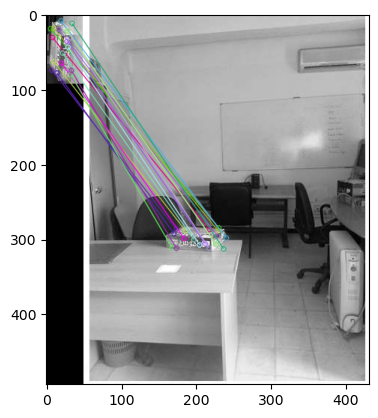

(<matplotlib.image.AxesImage at 0x7f01ac2448e0>, None)

In [12]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Code from:
# https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_matcher/py_matcher.html

# Prepared for M1IV students, by Prof. Slimane Larabi
#===================================================



img1 = cv2.imread('im1.png',0) # queryImage
img2 = cv2.imread('im1.jpg',0) # trainImage


# Initiate SIFT detector
sift = cv2.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
print(des1[0],kp1[0].pt)

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)



# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        print(m.queryIdx, m.trainIdx, m.distance, n.queryIdx, n.trainIdx, n.distance, n.imgIdx)
        good.append([m])
        
# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good, None, flags=2)

plt.imshow(img3),plt.show()